# Machine Learning Classifier

## import libraries

In [1]:
# !pip install pandas
import pandas as pd
import json
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import sem
from statistics import mean
import statsmodels.api as sm
# !pip install graphviz
import graphviz 
from IPython.display import SVG
from scipy.spatial import ConvexHull
from scipy import interpolate

In [2]:
from sklearn import tree
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import RepeatedStratifiedKFold
# !pip install -U scikit-learn
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

## read CSVs to dataframes

In [3]:
# news_media_basic_data

combined_analysis_data = pd.read_csv (r'/Users/katherina/data_science_tweets_neutrality/combined_analysis_data.csv')
combined_analysis_data

user_id                  user_name  user_followers_count  \
0   4.283330e+05          CNN Breaking News            63662926.0   
1   6.124730e+05              BBC News (UK)            14276300.0   
2   7.421430e+05           BBC News (World)            37774379.0   
3   7.592510e+05                        CNN            59357266.0   
4   7.885240e+05              Guardian news             3802981.0   
5   8.070950e+05         The New York Times            53885565.0   
6   1.367531e+06                   Fox News            22228143.0   
7   1.652541e+06                    Reuters            25471928.0   
8   1.917731e+06                   The Hill             4436643.0   
9   2.467791e+06        The Washington Post            19648090.0   
10  2.836421e+06                      MSNBC             4814934.0   
11  2.884771e+06                   Newsweek             3572805.0   
12  3.108351e+06    The Wall Street Journal            20084774.0   
13  5.392522e+06                        NPR             8983290.0   
14  5.402612e+06          BBC Breaking News            50727938.0   
15  5.741722e+06               NPR Politics             3063376.0   
16  5.988062e+06              The Economist            26869991.0   
17  7.587032e+06                   Sky News             7955300.0   
18  7.998482e+06         USA TODAY Politics              225721.0   
19  9.300262e+06                   POLITICO             4667612.0   
20  1.077465e+07                   TheBlaze              793465.0   
21  1.185603e+07               NBC Politics              666839.0   
22  1.385042e+07               CNN Politics             4439094.0   
23  1.417332e+07                   NBC News             9212344.0   
24  1.429331e+07                       TIME            19226664.0   
25  1.443406e+07               NYT Politics              524759.0   
26  1.451195e+07                   HuffPost            11358112.0   
27  1.466235e+07       The Washington Times              428947.0   
28  1.467792e+07             The New Yorker             9069623.0   
29  1.501249e+07                   CBS News             8719635.0   
30  1.516456e+07                      Slate             1759759.0   
31  1.545869e+07          HuffPost Politics             1439771.0   
32  1.575428e+07                  USA TODAY             4823489.0   
33  1.601278e+07            The Daily Beast             1389316.0   
34  1.603292e+07          Fox News Politics             1830566.0   
35  1.681564e+07          ABC News Politics             1079807.0   
36  1.693529e+07             Democracy Now!              807400.0   
37  1.851086e+07               Mother Jones              861988.0   
38  1.876770e+07          CBS News Politics              313486.0   
39  1.895607e+07        Washington Examiner              309186.0   
40  2.878549e+07                   ABC News            17644680.0   
41  2.909782e+07            The Epoch Times              486052.0   
42  3.235329e+07           The Economist US              139065.0   
43  3.471336e+07                  Bloomberg             8533888.0   
44  3.577304e+07               The Atlantic             2156682.0   
45  4.763640e+07          Guardian politics              256191.0   
46  6.932953e+07          BBC North America              312777.0   
47  8.781841e+07               The Guardian            10646480.0   
48  9.147862e+07                     Forbes            18202881.0   
49  1.409285e+08          POLITICO New York               39701.0   
50  2.705084e+08              CBS News Poll               13369.0   
51  3.802854e+08              Daily Mail US              416368.0   
52  3.844381e+08              ABC News Live               96020.0   
53  5.641116e+08         Bloomberg Politics              361262.0   
54  1.408004e+09             The Federalist              344587.0   
55  2.329067e+09              The Intercept              866020.0   
56  2.347049e+09                        Vox             1046634.0   
57  4.0

In [4]:
combined_analysis_data.describe()

user_id  user_followers_count  user_following_count  \
count  5.900000e+01          5.900000e+01             59.000000   
mean   1.998462e+16          9.783685e+06           3856.135593   
std    1.535048e+17          1.529765e+07          14899.722714   
min    4.283330e+05          8.158000e+03              3.000000   
25%    5.572167e+06          5.054055e+05            261.000000   
50%    1.501249e+07          3.063376e+06            722.000000   
75%    3.524320e+07          1.100230e+07           1328.000000   
max    1.179092e+18          6.366293e+07          94642.000000   

       count_total_tweet_id  count_total_tweet_created_at_date  count_reply  \
count             59.000000                          59.000000    59.000000   
mean            3493.338983                          52.084746    98.152542   
std             2617.594260                          14.251785   162.156248   
min               45.000000                           9.000000     0.000000   
25%             1093.500000                          48.000000     4.500000   
50%             3398.000000                          59.000000    30.000000   
75%             5455.500000                          62.000000   111.000000   
max             9149.000000                          62.000000   801.000000   

       count_retweet  count_tweet  avg_tweet_scores  count_abortion_tweet  \
count      59.000000    59.000000         59.000000             59.000000   
mean      273.254237  3121.932203         -0.057847             83.118644   
std       411.923394  2502.535348          0.084691             62.398078   
min         0.000000     2.000000         -0.251925              0.000000   
25%        30.500000   889.500000         -0.108054             37.000000   
50%       141.000000  2713.000000         -0.059752             70.000000   
75%       338.000000  4763.500000          0.003399            111.500000   
max      2393.000000  8895.000000          0.121937            272.000000   

       ...  avg_daily_total_tweet  avg_daily_tweet  avg_daily_retweet  \
count  ...              59.000000        59.000000          59.000000   
mean   ...              80.674915        73.153220           5.602712   
std    ...              90.548623        87.216284           9.138871   
min    ...               1.960000         0.050000           0.000000   
25%    ...              20.005000        16.145000           0.720000   
50%    ...              54.810000        43.760000           2.980000   
75%    ...              99.900000        85.715000           5.930000   
max    ...             420.590000       409.290000          49.850000   

       avg_daily_reply  perc_of_abortion_tweet  perc_of_gun_control_tweet  \
count        59.000000               59.000000                  59.000000   
mean          1.918305                0.040508                   0.086949   
std           3.017488                0.033136                   0.386180   
min           0.000000                0.000000                   0.000000   
25%           0.080000                0.015000                   0.030000   
50%           0.680000                0.030000                   0.040000   
75%           2.170000                0.060000                   0.050000   
max          14.560000                0.170000                   3.000000   

       perc_of_gay_marriage_keyword_percentage  perc_of_climate_change_tweet  \
count                                59.000000                     59.000000   
mean                                  0.001695                      0.051356   
std                                   0.004215                      0.019339   
min                                   0.000000                      0.000000   
25%                                   0.000000                      0.040000   
50%                                   0.000000                      0.050000   
75%                                   0.000000                      0.060000   
max       

In [5]:
combined_analysis_data.shape

(59, 36)

In [6]:
combined_analysis_data.isnull().sum()

user_id                                    0
user_name                                  0
user_followers_count                       0
user_following_count                       0
news_media                                 0
us_or_foreign                              0
general_or_political                       0
political_spectrum                         0
count_total_tweet_id                       0
count_total_tweet_created_at_date          0
count_reply                                0
count_retweet                              0
count_tweet                                0
avg_tweet_scores                           0
count_abortion_tweet                       0
avg_abortion_tweet_scores                  0
count_gun_control_tweet                    0
avg_gun_control_tweet_scores               0
count_gay_marriage_tweet                   0
avg_gay_marriage_tweet_scores              0
count_climate_change_tweet                 0
avg_climate_change_tweet_scores            0
count_gend

## prepare features and target

In [7]:
combined_analysis_data['is_us_media'] = np.where(combined_analysis_data['us_or_foreign']== 'US', 1, 0)

In [8]:
combined_analysis_data['is_political_account'] = np.where(combined_analysis_data['general_or_political']== 'Political', 1, 0)

In [9]:
combined_analysis_data.head()

user_id          user_name  user_followers_count  user_following_count  \
0  428333.0  CNN Breaking News            63662926.0                 121.0   
1  612473.0      BBC News (UK)            14276300.0                  93.0   
2  742143.0   BBC News (World)            37774379.0                  18.0   
3  759251.0                CNN            59357266.0                1103.0   
4  788524.0      Guardian news             3802981.0                1225.0   

     news_media us_or_foreign general_or_political political_spectrum  \
0           CNN            US              General               Left   
1      BBC News       Foreign              General             Middle   
2      BBC News       Foreign              General             Middle   
3           CNN            US              General               Left   
4  The Guardian       Foreign              General               Left   

   count_total_tweet_id  count_total_tweet_created_at_date  ...  \
0                   292                                 59  ...   
1                  4788                                 62  ...   
2                  2706                                 62  ...   
3                  4913                                 62  ...   
4                  5643                                 48  ...   

   avg_daily_retweet  avg_daily_reply  perc_of_abortion_tweet  \
0               0.20             0.02                    0.02   
1               6.98             0.06                    0.00   
2               2.10             0.06                    0.01   
3               0.44             0.42                    0.03   
4               0.00             0.00                    0.01   

   perc_of_gun_control_tweet  perc_of_gay_marriage_keyword_percentage  \
0                       0.04                                      0.0   
1                       0.02                                      0.0   
2                       0.02                                      0.0   
3                       0.04                                      0.0   
4                       0.01                                      0.0   

   perc_of_climate_change_tweet  perc_of_gender_identity_tweet  \
0                          0.05                           0.00   
1                          0.03                           0.01   
2                          0.04                           0.01   
3                          0.06                           0.02   
4                          0.04                           0.01   

   perc_of_inflation_keyword_tweet  is_us_media  is_political_account  
0                             0.03            1                     0  
1                             0.04            0                     0  
2                             0.01            0                     0  
3                             0.02            1                     0  
4                             0.04            0                     0  

[5 rows x 38 columns]

In [10]:
# features and target

x = combined_analysis_data[[
    'user_followers_count',
    'user_following_count',
    'is_us_media',
    'is_political_account',
    'avg_tweet_scores',
    'avg_abortion_tweet_scores',
    'avg_gun_control_tweet_scores',
    'avg_gay_marriage_tweet_scores',
    'avg_climate_change_tweet_scores',
    'avg_gender_identity_tweet_scores',
    'avg_inflation_tweet_scores',
    'avg_daily_total_tweet',
    'avg_daily_tweet',
    'avg_daily_retweet',
    'avg_daily_reply',
    'perc_of_abortion_tweet',
    'perc_of_gun_control_tweet',
    'perc_of_gay_marriage_keyword_percentage',
    'perc_of_climate_change_tweet',
    'perc_of_gender_identity_tweet',
    'perc_of_inflation_keyword_tweet'    
]]
y = combined_analysis_data['political_spectrum']

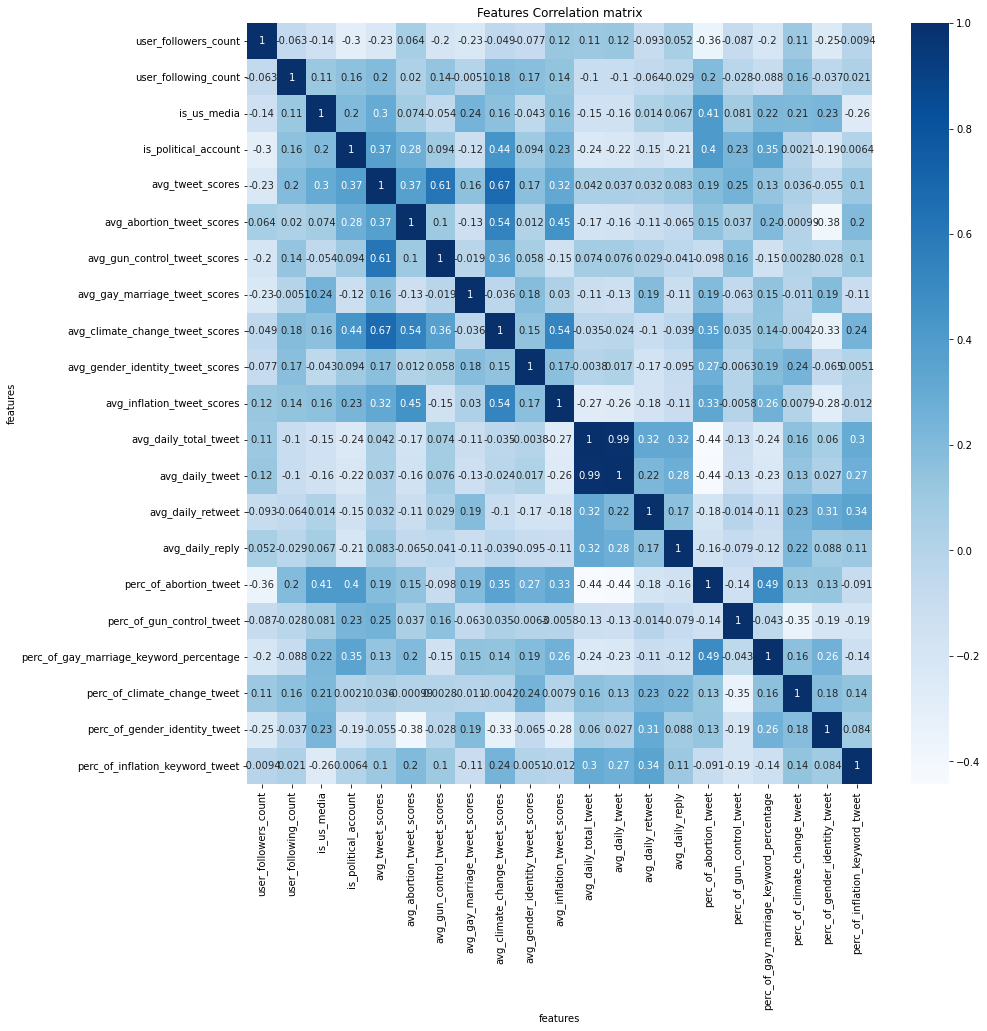

In [11]:
# correlation heatmap of features

plt.figure(figsize=(14,14))
heatmap = sns.heatmap(x.corr(), annot = True, cmap="Blues")
heatmap.set(xlabel='features', ylabel='features', title = "Features Correlation matrix")
plt.show()

In [12]:
x = x.drop(columns=['avg_daily_total_tweet'])
features = x.columns.tolist()
target = combined_analysis_data['political_spectrum'].values

In [13]:
# number of features
len(features)

20

In [14]:
# number of sample
n = len(combined_analysis_data)
n

59

In [15]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

## functions for model evaluation

In [16]:
# functions to evaluate a given model using repeated kfold cross-validation and LeaveOneOut techniques

loocv = LeaveOneOut()

k_values = [2,3,4,5,6,7,8,9,10]

# to evaluate the model with repeated kfold cross-validation, to get aerage accuracy and standard deviation
def evaluate_model_kfold_scores(model, x, y, k_values):
    # define the evaluation procedure
    mean_score_list = []
    std_score_list = []
    
    for k in k_values:
        cv = RepeatedStratifiedKFold(n_splits=k, n_repeats=10, random_state=1)
        scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
        mean_score_list.append(round(mean(scores),3))
        std_score_list.append(round(np.std(scores),3))
  
    list_of_tuples = list(zip(k_values, mean_score_list, std_score_list))
    kfold_scores_df = pd.DataFrame(list_of_tuples, columns = ['k_fold', 'avg_accuracy', 'standard_deviation'])
    return kfold_scores_df

# to evaluate the model with LeaveOneOut cross-validation, to get aerage accuracy and standard deviation
def evaluate_model_loocv_scores(model, x, y):
    scores = cross_val_score(model, x, y, scoring='accuracy', cv=loocv, n_jobs=-1)
    # loocv is k fold with k equal sampke size n
    loocv_scores_df = pd.DataFrame(data={'loocv_n': n, 'avg_accuracy': round(mean(scores),3), 'standard_deviation': round(np.std(scores),3)},index=[0])
    return loocv_scores_df

# to combine the results from evaluate_model_kfold_scores and evaluate_model_loocv_scores
def combine_kfold_loocv_scores(kfold_scores_df,loocv_scores_df):
    combined_kfold_loocv_scores_df = pd.concat([kfold_scores_df,loocv_scores_df.rename(columns={'loocv_n':'k_fold'})])
    return combined_kfold_loocv_scores_df

# to plot the combine results
def plot_model_scores(scores_df):
    plt.figure(figsize=(12,8))
    plt.plot(scores_df['k_fold'], scores_df['avg_accuracy'], marker='x', label = 'avg_accuracy')
    plt.plot(scores_df['k_fold'], scores_df['standard_deviation'], marker='x', label = 'standard_deviation')
    plt.legend(loc='best')
    plt.xlabel('k_fold or loocv_n')
    plt.ylabel('avg_accuracy and standard_deviation')
    plt.title('avg_accuracy and standard_deviation by k_fold and loocv')
    plt.show()

def kfold_5_10_scores(scores_df):
    kfold_5_10_scores_df = scores_df[(scores_df['k_fold'] >= 5)&(scores_df['k_fold'] <= 10)]
    return kfold_5_10_scores_df

def average_accuracy_and_standard_deviation(scores_df, model_name):
    avg_scores_df = scores_df[['avg_accuracy','standard_deviation']].mean().add_prefix('5_to_10_fold_avg_').reset_index(name = model_name)
    return avg_scores_df

## classifiers

### decision tree

#### decision tree with all features

   k_fold  avg_accuracy  standard_deviation
0       2         0.554               0.095
1       3         0.614               0.102
2       4         0.601               0.107
3       5         0.622               0.102
4       6         0.632               0.119
5       7         0.609               0.142
6       8         0.596               0.168
7       9         0.599               0.167
8      10         0.614               0.176
   loocv_n  avg_accuracy  standard_deviation
0       59         0.559               0.496


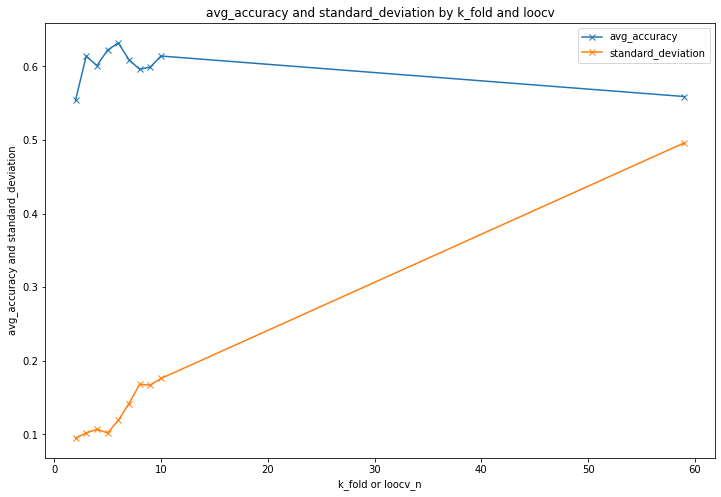

                                 index  dtree_gini
0        5_to_10_fold_avg_avg_accuracy    0.612000
1  5_to_10_fold_avg_standard_deviation    0.145667


In [17]:
# train a decision tree with criterion="gini"
dtree_gini = tree.DecisionTreeClassifier(criterion="gini")
dtree_gini = dtree_gini.fit(x, y)

# evaluate the model with repeated kfold cross-validation and LeaveOneOut techniques
kfold_scores_df = evaluate_model_kfold_scores(dtree_gini, x, y, k_values)
print(kfold_scores_df)

loocv_scores_df = evaluate_model_loocv_scores(dtree_gini, x, y)
print(loocv_scores_df)

# plot the model performance scores
dtree_gini_scores_df = combine_kfold_loocv_scores(kfold_scores_df,loocv_scores_df)
plot_model_scores(dtree_gini_scores_df)

# average avg_accuracy and standard_deviation for 5-10 folds
dtree_gini_kfold_5_10_scores_df = kfold_5_10_scores(dtree_gini_scores_df)
dtree_gini_kfold_5_10_evaluation = average_accuracy_and_standard_deviation(dtree_gini_kfold_5_10_scores_df, 'dtree_gini')
print(dtree_gini_kfold_5_10_evaluation)

   k_fold  avg_accuracy  standard_deviation
0       2         0.555               0.092
1       3         0.569               0.109
2       4         0.580               0.108
3       5         0.573               0.112
4       6         0.593               0.136
5       7         0.574               0.125
6       8         0.552               0.164
7       9         0.576               0.150
8      10         0.581               0.164
   loocv_n  avg_accuracy  standard_deviation
0       59         0.542               0.498


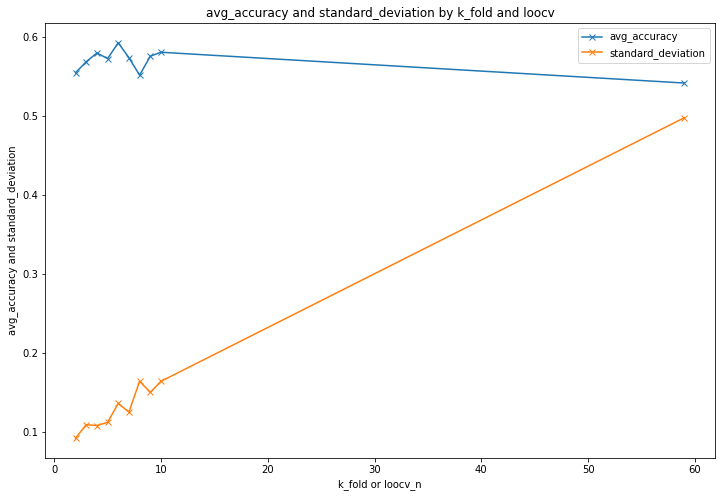

                                 index  dtree_entropy
0        5_to_10_fold_avg_avg_accuracy       0.574833
1  5_to_10_fold_avg_standard_deviation       0.141833


In [18]:
# train a decision tree with criterion="entropy"
dtree_entropy = tree.DecisionTreeClassifier(criterion="entropy")
dtree_entropy = dtree_entropy.fit(x, y)

# evaluate the model with repeated kfold cross-validation and LeaveOneOut techniques
kfold_scores_df = evaluate_model_kfold_scores(dtree_entropy, x, y, k_values)
print(kfold_scores_df)

loocv_scores_df = evaluate_model_loocv_scores(dtree_entropy, x, y)
print(loocv_scores_df)

# plot the model performance scores
dtree_entropy_scores_df = combine_kfold_loocv_scores(kfold_scores_df,loocv_scores_df)
plot_model_scores(dtree_entropy_scores_df)

# average avg_accuracy and standard_deviation for 5-10 folds
dtree_entropy_kfold_5_10_scores_df = kfold_5_10_scores(dtree_entropy_scores_df)
dtree_entropy_kfold_5_10_evaluation = average_accuracy_and_standard_deviation(dtree_entropy_kfold_5_10_scores_df, 'dtree_entropy')
print(dtree_entropy_kfold_5_10_evaluation)

#### decision tree with standardised features

In [19]:
scaler = StandardScaler()
x_standardised = scaler.fit_transform(x)

   k_fold  avg_accuracy  standard_deviation
0       2         0.570               0.103
1       3         0.617               0.096
2       4         0.588               0.119
3       5         0.627               0.105
4       6         0.624               0.118
5       7         0.611               0.130
6       8         0.591               0.165
7       9         0.586               0.164
8      10         0.598               0.165
   loocv_n  avg_accuracy  standard_deviation
0       59         0.542               0.498


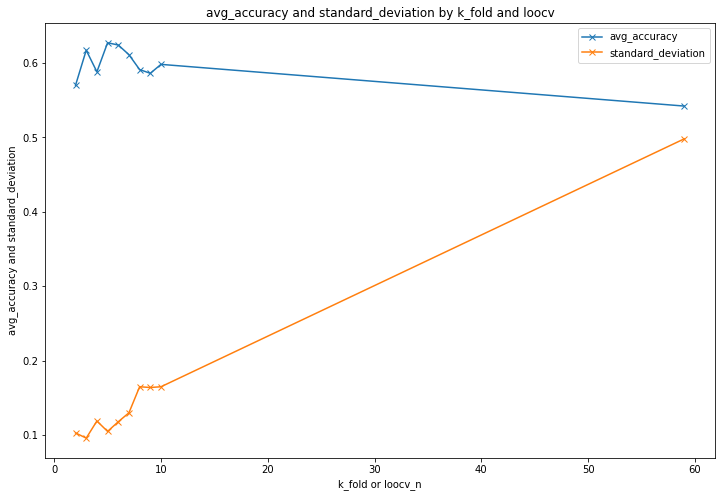

                                 index  dtree_gini_standardised
0        5_to_10_fold_avg_avg_accuracy                 0.606167
1  5_to_10_fold_avg_standard_deviation                 0.141167


In [20]:
# train a decision tree with criterion="gini" and standardised x
dtree_gini_standardised = tree.DecisionTreeClassifier(criterion="gini")
dtree_gini_standardised = dtree_gini.fit(x_standardised, y)

# evaluate the model with repeated kfold cross-validation and LeaveOneOut techniques
kfold_scores_df = evaluate_model_kfold_scores(dtree_gini_standardised, x_standardised, y, k_values)
print(kfold_scores_df)

loocv_scores_df = evaluate_model_loocv_scores(dtree_gini_standardised, x_standardised, y)
print(loocv_scores_df)

# plot the model performance scores
dtree_gini_standardised_scores_df = combine_kfold_loocv_scores(kfold_scores_df,loocv_scores_df)
plot_model_scores(dtree_gini_standardised_scores_df)

# average avg_accuracy and standard_deviation for 5-10 folds
dtree_gini_standardised_kfold_5_10_scores_df = kfold_5_10_scores(dtree_gini_standardised_scores_df)
dtree_gini_standardised_kfold_5_10_evaluation = average_accuracy_and_standard_deviation(dtree_gini_standardised_kfold_5_10_scores_df, 'dtree_gini_standardised')
print(dtree_gini_standardised_kfold_5_10_evaluation)

   k_fold  avg_accuracy  standard_deviation
0       2         0.549               0.101
1       3         0.569               0.117
2       4         0.580               0.120
3       5         0.578               0.108
4       6         0.588               0.140
5       7         0.562               0.128
6       8         0.564               0.155
7       9         0.566               0.171
8      10         0.581               0.172
   loocv_n  avg_accuracy  standard_deviation
0       59         0.559               0.496


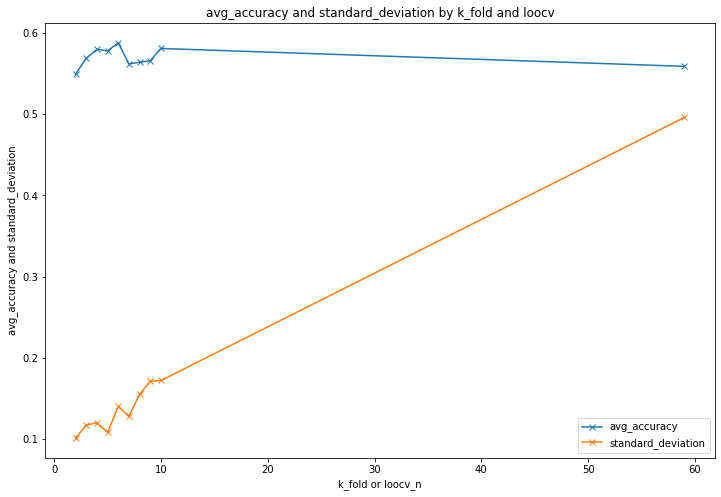

                                 index  dtree_entropy_standardised
0        5_to_10_fold_avg_avg_accuracy                    0.573167
1  5_to_10_fold_avg_standard_deviation                    0.145667


In [21]:
# train a decision tree with criterion="entropy" and standardised x
dtree_entropy_standardised = tree.DecisionTreeClassifier(criterion="entropy")
dtree_entropy_standardised = dtree_entropy.fit(x_standardised, y)

# evaluate the model with repeated kfold cross-validation and LeaveOneOut techniques
kfold_scores_df = evaluate_model_kfold_scores(dtree_entropy_standardised, x_standardised, y, k_values)
print(kfold_scores_df)

loocv_scores_df = evaluate_model_loocv_scores(dtree_entropy_standardised, x_standardised, y)
print(loocv_scores_df)

# plot the model performance scores
dtree_entropy_standardised_scores_df = combine_kfold_loocv_scores(kfold_scores_df,loocv_scores_df)
plot_model_scores(dtree_entropy_standardised_scores_df)

# average avg_accuracy and standard_deviation for 5-10 folds
dtree_entropy_standardised_kfold_5_10_scores_df = kfold_5_10_scores(dtree_entropy_standardised_scores_df)
dtree_entropy_standardised_kfold_5_10_evaluation = average_accuracy_and_standard_deviation(dtree_entropy_standardised_kfold_5_10_scores_df, 'dtree_entropy_standardised')
print(dtree_entropy_standardised_kfold_5_10_evaluation)

In [22]:
# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,24), dpi=800)
# tree.plot_tree(dtree_entropy,
#               feature_names = features,
#               class_names=target,
#               filled = True)

#### decision tree with selected features using SelectFromModel

In [29]:
# evaluate features based on importance
# Extracting the importances by sklearn 
# importances_sk = dtree.feature_importances_

# feature_importance_sk = {}
# for i, feature in enumerate(features):
#     feature_importance_sk[feature] = round(importances_sk[i], 3)

# print(f"Feature importance by sklearn: {feature_importance_sk}")

# dtree.tree_.compute_feature_importances(normalize=False)

feature_importances = pd.DataFrame(dtree_gini.feature_importances_,
                                   index = x.columns)
feature_importances.columns = ['importance']

print(feature_importances)

                                         importance
user_followers_count                       0.000000
user_following_count                       0.226185
is_us_media                                0.000000
is_political_account                       0.000000
avg_tweet_scores                           0.000000
avg_abortion_tweet_scores                  0.257181
avg_gun_control_tweet_scores               0.000000
avg_gay_marriage_tweet_scores              0.087322
avg_climate_change_tweet_scores            0.078961
avg_gender_identity_tweet_scores           0.090447
avg_inflation_tweet_scores                 0.000000
avg_daily_tweet                            0.054357
avg_daily_retweet                          0.000000
avg_daily_reply                            0.117360
perc_of_abortion_tweet                     0.000000
perc_of_gun_control_tweet                  0.000000
perc_of_gay_marriage_keyword_percentage    0.000000
perc_of_climate_change_tweet               0.000000
perc_of_gend

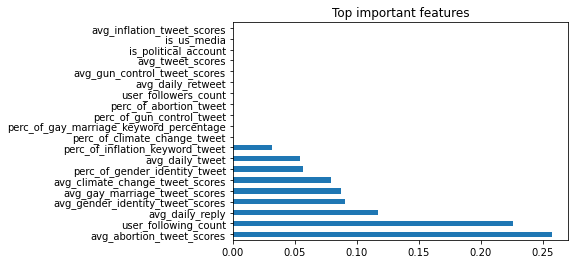

In [30]:
feat_importances = pd.Series(dtree_gini.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title("Top important features")
plt.show()

In [31]:
# get best features

selector_dtree = SelectFromModel(tree.DecisionTreeClassifier()).fit(x,y)

selector_dtree_support = selector_dtree.get_support()
selector_dtree_feature = x.loc[:,selector_dtree_support].columns.tolist()
print(str(len(selector_dtree_feature)), 'selected features:', selector_dtree_feature)

8 selected features: ['user_following_count', 'avg_abortion_tweet_scores', 'avg_gay_marriage_tweet_scores', 'avg_gender_identity_tweet_scores', 'avg_daily_tweet', 'avg_daily_reply', 'perc_of_gender_identity_tweet', 'perc_of_inflation_keyword_tweet']


In [32]:
selected_x = selector_dtree.transform(x)
selected_x.shape

(59, 8)

   k_fold  avg_accuracy  standard_deviation
0       2         0.574               0.102
1       3         0.644               0.091
2       4         0.634               0.116
3       5         0.664               0.124
4       6         0.673               0.123
5       7         0.662               0.134
6       8         0.654               0.155
7       9         0.663               0.166
8      10         0.667               0.168
   loocv_n  avg_accuracy  standard_deviation
0       59         0.678               0.467


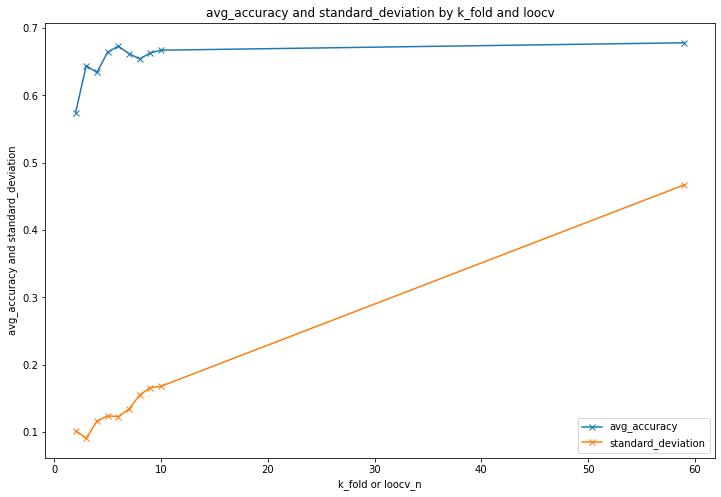

                                 index  \
0        5_to_10_fold_avg_avg_accuracy   
1  5_to_10_fold_avg_standard_deviation   

   dtree_gini_standardised_selected_features  
0                                   0.663833  
1                                   0.145000  


In [33]:
# train a decision tree with selected features and criterion="gini"
dtree_gini_selected_features = tree.DecisionTreeClassifier(criterion="gini")
dtree_gini_selected_features = dtree_gini_selected_features.fit(selected_x, y)

# evaluate the model with repeated kfold cross-validation and LeaveOneOut techniques
kfold_scores_df = evaluate_model_kfold_scores(dtree_gini_selected_features, selected_x, y, k_values)
print(kfold_scores_df)

loocv_scores_df = evaluate_model_loocv_scores(dtree_gini_selected_features, selected_x, y)
print(loocv_scores_df)

# plot the model performance scores
dtree_gini_selected_features_scores_df = combine_kfold_loocv_scores(kfold_scores_df,loocv_scores_df)
plot_model_scores(dtree_gini_selected_features_scores_df)

# average avg_accuracy and standard_deviation for 3-10 folds
dtree_gini_selected_features_kfold_5_10_scores_df = kfold_5_10_scores(dtree_gini_selected_features_scores_df)
dtree_gini_selected_features_kfold_5_10_evaluation = average_accuracy_and_standard_deviation(dtree_gini_selected_features_kfold_5_10_scores_df, 'dtree_gini_standardised_selected_features')
print(dtree_gini_selected_features_kfold_5_10_evaluation)

   k_fold  avg_accuracy  standard_deviation
0       2         0.583               0.073
1       3         0.618               0.098
2       4         0.595               0.136
3       5         0.636               0.114
4       6         0.632               0.151
5       7         0.613               0.136
6       8         0.629               0.154
7       9         0.653               0.162
8      10         0.660               0.165
   loocv_n  avg_accuracy  standard_deviation
0       59         0.644               0.479


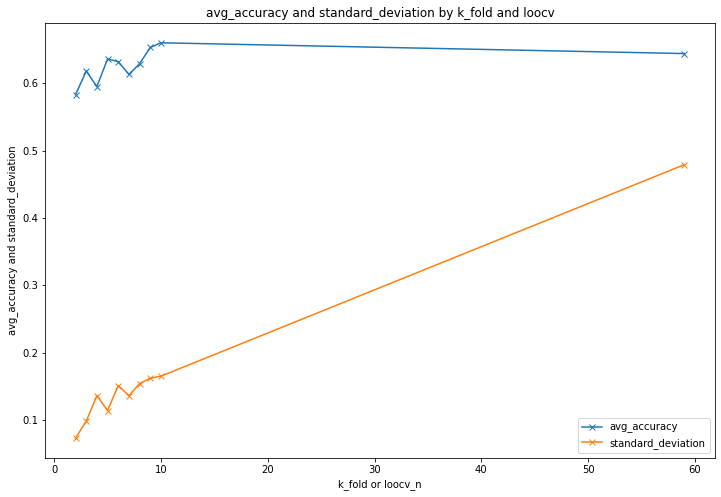

                                 index  \
0        5_to_10_fold_avg_avg_accuracy   
1  5_to_10_fold_avg_standard_deviation   

   dtree_entropy_standardised_selected_features  
0                                      0.637167  
1                                      0.147000  


In [34]:
# train a decision tree with selected features and criterion="entropy"
dtree_entropy_selected_features = tree.DecisionTreeClassifier(criterion="entropy")
dtree_entropy_selected_features = dtree_entropy_selected_features.fit(selected_x, y)

# evaluate the model with repeated kfold cross-validation and LeaveOneOut techniques
kfold_scores_df = evaluate_model_kfold_scores(dtree_entropy_selected_features, selected_x, y, k_values)
print(kfold_scores_df)

loocv_scores_df = evaluate_model_loocv_scores(dtree_entropy_selected_features, selected_x, y)
print(loocv_scores_df)

# plot the model performance scores
dtree_entropy_selected_features_scores_df = combine_kfold_loocv_scores(kfold_scores_df,loocv_scores_df)
plot_model_scores(dtree_entropy_selected_features_scores_df)

# average avg_accuracy and standard_deviation for 5-10 folds
dtree_entropy_selected_features_kfold_5_10_scores_df = kfold_5_10_scores(dtree_entropy_selected_features_scores_df)
dtree_entropy_selected_features_kfold_5_10_evaluation = average_accuracy_and_standard_deviation(dtree_entropy_selected_features_kfold_5_10_scores_df, 'dtree_entropy_standardised_selected_features')
print(dtree_entropy_selected_features_kfold_5_10_evaluation)

In [35]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,24), dpi=800)
tree.plot_tree(dtree_entropy_selected_features,
              feature_names = selector_dtree_feature,
              class_names=target,
              filled = True)

[Text(0.5735294117647058, 0.9375, 'avg_abortion_tweet_scores <= -0.072\nentropy = 1.324\nsamples = 59\nvalue = [37, 12, 10]\nclass = Left'),
 Text(0.3235294117647059, 0.8125, 'avg_gender_identity_tweet_scores <= 0.025\nentropy = 1.494\nsamples = 21\nvalue = [7, 4, 10]\nclass = Middle'),
 Text(0.17647058823529413, 0.6875, 'avg_daily_reply <= 1.85\nentropy = 0.89\nsamples = 13\nvalue = [4, 0, 9]\nclass = Middle'),
 Text(0.11764705882352941, 0.5625, 'perc_of_inflation_keyword_tweet <= 0.005\nentropy = 0.469\nsamples = 10\nvalue = [1, 0, 9]\nclass = Middle'),
 Text(0.058823529411764705, 0.4375, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = Left'),
 Text(0.17647058823529413, 0.4375, 'entropy = 0.0\nsamples = 9\nvalue = [0, 0, 9]\nclass = Middle'),
 Text(0.23529411764705882, 0.5625, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0]\nclass = Left'),
 Text(0.47058823529411764, 0.6875, 'avg_abortion_tweet_scores <= -0.133\nentropy = 1.406\nsamples = 8\nvalue = [3, 4, 1]\nclass = Middle')

#### decision tree using GridSearchCV to choose the best estimator

In [36]:
parameters = {'criterion':['gini','entropy'], 
              'max_depth':range(3,20),
              'max_leaf_nodes': list(range(2, 21)), 
              'min_samples_split': [2, 3, 4, 5],
              'max_features':list(range(2, 21))}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4, cv=10)
clf.fit(X=selected_x, y=y)
dtree_gridsearch_best_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

0.8133333333333335 {'criterion': 'gini', 'max_depth': 4, 'max_features': 4, 'max_leaf_nodes': 19, 'min_samples_split': 4}


In [37]:
dtree_gridsearch_best_model.get_params(deep=True)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 4,
 'max_leaf_nodes': 19,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

   k_fold  avg_accuracy  standard_deviation
0       2         0.579               0.094
1       3         0.625               0.075
2       4         0.614               0.115
3       5         0.676               0.091
4       6         0.628               0.120
5       7         0.662               0.155
6       8         0.650               0.134
7       9         0.638               0.159
8      10         0.662               0.176
   loocv_n  avg_accuracy  standard_deviation
0       59         0.729               0.445


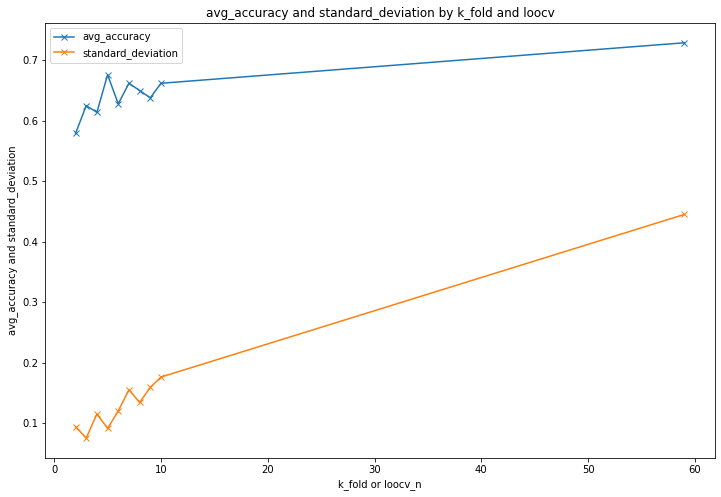

                                 index  \
0        5_to_10_fold_avg_avg_accuracy   
1  5_to_10_fold_avg_standard_deviation   

   dtree_gs_best_model_standardised_selected_features  
0                                           0.652667   
1                                           0.139167   


In [38]:
dtree_gridsearch_best_model.fit(selected_x, y)

# evaluate the model with repeated kfold cross-validation and LeaveOneOut techniques
kfold_scores_df = evaluate_model_kfold_scores(dtree_gridsearch_best_model, selected_x, y, k_values)
print(kfold_scores_df)

loocv_scores_df = evaluate_model_loocv_scores(dtree_gridsearch_best_model, selected_x, y)
print(loocv_scores_df)

# plot the model performance scores
dtree_gridsearch_best_model_scores_df = combine_kfold_loocv_scores(kfold_scores_df,loocv_scores_df)
plot_model_scores(dtree_gridsearch_best_model_scores_df)

# average avg_accuracy and standard_deviation for 5-10 folds
dtree_gridsearch_best_model_kfold_5_10_scores_df = kfold_5_10_scores(dtree_gridsearch_best_model_scores_df)
dtree_gridsearch_best_model_kfold_5_10_evaluation = average_accuracy_and_standard_deviation(dtree_gridsearch_best_model_kfold_5_10_scores_df, 'dtree_gs_best_model_standardised_selected_features')
print(dtree_gridsearch_best_model_kfold_5_10_evaluation)

In [85]:
for k in [5,6,7,8,9,10]:
    cv = RepeatedStratifiedKFold(n_splits=k, n_repeats=10, random_state=1)
    scores = cross_val_score(dtree_gridsearch_best_model, selected_x, y, scoring='accuracy', cv=cv, n_jobs=-1)
    print('k: ', k, ', scores: ', scores)

k:  5 , scores:  [0.5        0.75       0.58333333 0.25       0.54545455 0.75
 0.58333333 0.58333333 0.75       0.63636364 0.58333333 0.58333333
 0.66666667 0.66666667 0.63636364 0.5        0.66666667 0.5
 0.66666667 0.54545455 0.83333333 0.66666667 0.58333333 0.66666667
 0.63636364 0.75       0.75       0.58333333 0.58333333 0.81818182
 0.5        0.83333333 0.5        0.41666667 0.54545455 0.58333333
 0.66666667 0.75       0.33333333 0.63636364 0.5        0.75
 0.66666667 0.75       0.45454545 0.75       0.58333333 0.66666667
 0.5        0.54545455]
k:  6 , scores:  [0.7        0.8        0.5        0.9        0.5        0.55555556
 0.7        0.8        0.5        0.9        0.6        0.77777778
 0.8        0.6        0.7        0.5        0.7        0.66666667
 0.9        0.5        0.4        0.5        0.4        0.66666667
 0.7        0.8        0.6        0.5        0.9        0.33333333
 0.7        0.7        0.8        0.7        0.7        0.66666667
 0.7        0.8        

In [39]:
dtree_gridsearch_best_model_feature_importances = pd.DataFrame(dtree_gridsearch_best_model.feature_importances_,
                                   index = selector_dtree_feature)
dtree_gridsearch_best_model_feature_importances.columns = ['importance']

print(dtree_gridsearch_best_model_feature_importances)

                                  importance
user_following_count                0.401182
avg_abortion_tweet_scores           0.000000
avg_gay_marriage_tweet_scores       0.072323
avg_gender_identity_tweet_scores    0.000000
avg_daily_tweet                     0.166540
avg_daily_reply                     0.000000
perc_of_gender_identity_tweet       0.231135
perc_of_inflation_keyword_tweet     0.128821


In [40]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,24), dpi=800)
tree.plot_tree(dtree_gridsearch_best_model,
              feature_names = selector_dtree_feature,
              class_names=target,
              filled = True)

[Text(0.375, 0.9, 'user_following_count <= 107.0\ngini = 0.537\nsamples = 59\nvalue = [37, 12, 10]\nclass = Left'),
 Text(0.16666666666666666, 0.7, 'perc_of_gender_identity_tweet <= 0.035\ngini = 0.444\nsamples = 6\nvalue = [0, 4, 2]\nclass = Middle'),
 Text(0.08333333333333333, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]\nclass = Middle'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = Middle'),
 Text(0.5833333333333334, 0.7, 'avg_daily_tweet <= 93.31\ngini = 0.467\nsamples = 53\nvalue = [37, 8, 8]\nclass = Left'),
 Text(0.4166666666666667, 0.5, 'user_following_count <= 38107.5\ngini = 0.353\nsamples = 43\nvalue = [34, 5, 4]\nclass = Left'),
 Text(0.3333333333333333, 0.3, 'avg_gay_marriage_tweet_scores <= 0.367\ngini = 0.297\nsamples = 41\nvalue = [34, 3, 4]\nclass = Left'),
 Text(0.25, 0.1, 'gini = 0.174\nsamples = 32\nvalue = [29, 1, 2]\nclass = Left'),
 Text(0.4166666666666667, 0.1, 'gini = 0.593\nsamples = 9\nvalue = [5, 2, 2]\nclass = Left'),
 Text(0.5

In [41]:
# #Predict the response for test dataset
# y_pred = dtree_2.predict(x_selected_test)

# # Model Accuracy, how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

### logistic regression

In [42]:
x = combined_analysis_data[[
    'user_followers_count',
    'user_following_count',
    'is_us_media',
    'is_political_account',
    'avg_tweet_scores',
    'avg_abortion_tweet_scores',
    'avg_gun_control_tweet_scores',
    'avg_gay_marriage_tweet_scores',
    'avg_climate_change_tweet_scores',
    'avg_gender_identity_tweet_scores',
    'avg_inflation_tweet_scores',
    'avg_daily_tweet',
    'avg_daily_retweet',
    'avg_daily_reply',
    'perc_of_abortion_tweet',
    'perc_of_gun_control_tweet',
    'perc_of_gay_marriage_keyword_percentage',
    'perc_of_climate_change_tweet',
    'perc_of_gender_identity_tweet',
    'perc_of_inflation_keyword_tweet'    
]]
y = combined_analysis_data['political_spectrum']

#### logistic regression with x in original values

   k_fold  avg_accuracy  standard_deviation
0       2         0.499               0.126
1       3         0.468               0.121
2       4         0.484               0.106
3       5         0.506               0.111
4       6         0.504               0.127
5       7         0.505               0.119
6       8         0.500               0.133
7       9         0.507               0.128
8      10         0.503               0.159
   loocv_n  avg_accuracy  standard_deviation
0       59         0.492                 0.5


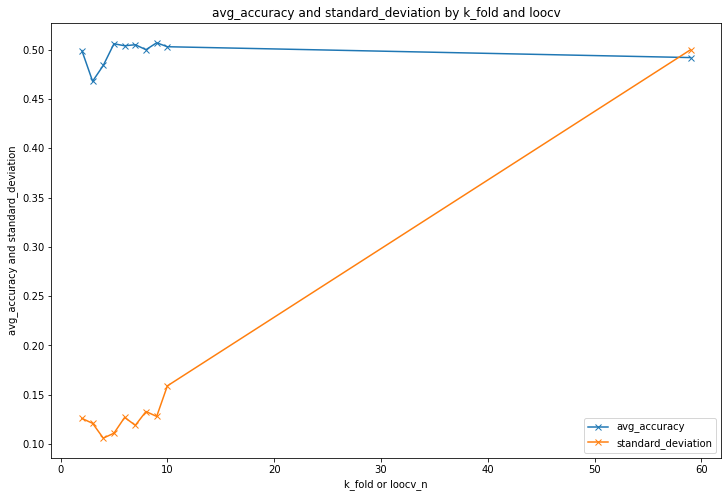

                                 index  lr_model
0        5_to_10_fold_avg_avg_accuracy  0.504167
1  5_to_10_fold_avg_standard_deviation  0.129500


In [43]:
# define the multinomial logistic regression model
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=1.0, max_iter = 4000)

# train a logistic regression model
lr_model.fit(x,y)

# evaluate the model with repeated kfold cross-validation and LeaveOneOut techniques
kfold_scores_df = evaluate_model_kfold_scores(lr_model, x, y, k_values)
print(kfold_scores_df)

loocv_scores_df = evaluate_model_loocv_scores(lr_model, x, y)
print(loocv_scores_df)

# plot the model performance scores
lr_model_scores_df = combine_kfold_loocv_scores(kfold_scores_df,loocv_scores_df)
plot_model_scores(lr_model_scores_df)

# average avg_accuracy and standard_deviation for 5-10 folds
lr_model_kfold_5_10_scores_df = kfold_5_10_scores(lr_model_scores_df)
lr_model_kfold_5_10_evaluation = average_accuracy_and_standard_deviation(lr_model_kfold_5_10_scores_df, 'lr_model')
print(lr_model_kfold_5_10_evaluation)

#### logistic regression with x in standardised values

In [44]:
scaler = StandardScaler()
x_standardised = scaler.fit_transform(x)

In [45]:
# x_train_std, x_test_std, y_train, y_test = train_test_split(x_std, y, test_size = 0.2)

   k_fold  avg_accuracy  standard_deviation
0       2         0.674               0.077
1       3         0.700               0.070
2       4         0.719               0.107
3       5         0.749               0.096
4       6         0.733               0.112
5       7         0.744               0.125
6       8         0.729               0.140
7       9         0.760               0.142
8      10         0.744               0.155
   loocv_n  avg_accuracy  standard_deviation
0       59         0.746               0.435


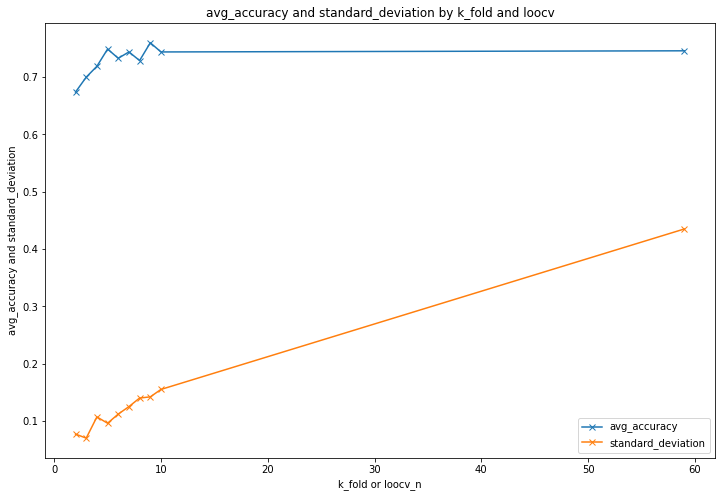

                                 index  lr_model_standardised
0        5_to_10_fold_avg_avg_accuracy               0.743167
1  5_to_10_fold_avg_standard_deviation               0.128333


In [46]:
# define the multinomial logistic regression model
lr_model_standardised = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=1.0)

# train a logistic regression model
lr_model_standardised.fit(x_standardised,y)

# evaluate the model with repeated kfold cross-validation and LeaveOneOut techniques
kfold_scores_df = evaluate_model_kfold_scores(lr_model_standardised, x_standardised, y, k_values)
print(kfold_scores_df)

loocv_scores_df = evaluate_model_loocv_scores(lr_model_standardised, x_standardised, y)
print(loocv_scores_df)

# plot the model performance scores
lr_model_standardised_scores_df = combine_kfold_loocv_scores(kfold_scores_df,loocv_scores_df)
plot_model_scores(lr_model_standardised_scores_df)

# average avg_accuracy and standard_deviation for 5-10 folds
lr_model_standardised_kfold_5_10_scores_df = kfold_5_10_scores(lr_model_standardised_scores_df)
lr_model_standardised_kfold_5_10_evaluation = average_accuracy_and_standard_deviation(lr_model_standardised_kfold_5_10_scores_df, 'lr_model_standardised')
print(lr_model_standardised_kfold_5_10_evaluation)

#### logistic regression with selected x using coef

In [48]:
print('intercept', lr_model_standardised.intercept_)
print('classes', lr_model_standardised.classes_)

coef_1 = lr_model_standardised.coef_[0]
coef_2 = lr_model_standardised.coef_[1]
coef_3 = lr_model_standardised.coef_[2]
list_of_tuples = list(zip(x.columns, coef_1, coef_2, coef_3))
feat_coef = pd.DataFrame(list_of_tuples, columns = ['features', 'coef_1', 'coef_2', 'coef_3'])
feat_coef['sum_abs_coef'] = abs(feat_coef['coef_1']) + abs(feat_coef['coef_2']) + abs(feat_coef['coef_3'])
feat_coef

intercept [ 1.97830473 -0.29938795 -1.67891678]
classes ['Left' 'Middle' 'Right']


features    coef_1    coef_2    coef_3  \
0                      user_followers_count  0.011076  0.338486 -0.349561   
1                      user_following_count -0.626875  0.708488 -0.081613   
2                               is_us_media -0.134828 -0.214229  0.349057   
3                      is_political_account -0.102669 -0.073739  0.176408   
4                          avg_tweet_scores  0.122416  0.081825 -0.204241   
5                 avg_abortion_tweet_scores  0.808468  0.127530 -0.935998   
6              avg_gun_control_tweet_scores  0.767925 -0.525699 -0.242226   
7             avg_gay_marriage_tweet_scores  0.080201  0.074790 -0.154991   
8           avg_climate_change_tweet_scores  0.062553  0.373806 -0.436359   
9          avg_gender_identity_tweet_scores -0.371160  0.532183 -0.161023   
10               avg_inflation_tweet_scores  0.459116 -0.040967 -0.418149   
11                          avg_daily_tweet -0.464143  0.035871  0.428272   
12                        avg_daily_retweet  0.213210 -0.496888  0.283678   
13                          avg_daily_reply  0.387350  0.399616 -0.786966   
14                   perc_of_abortion_tweet  0.610521 -0.668588  0.058068   
15                perc_of_gun_control_tweet  0.142282 -0.095208 -0.047074   
16  perc_of_gay_marriage_keyword_percentage  0.516649 -0.222615 -0.294034   
17             perc_of_climate_change_tweet  0.802042 -0.339734 -0.462308   
18            perc_of_gender_identity_tweet -0.522284 -0.109589  0.631873   
19          perc_of_inflation_keyword_tweet -0.698628  0.402408  0.296220   

    sum_abs_coef  
0       0.699123  
1       1.416976  
2       0.698114  
3       0.352816  
4       0.408482  
5       1.871996  
6       1.535850  
7       0.309982  
8       0.872718  
9       1.064365  
10      0.918232  
11      0.928285  
12      0.993775  
13      1.573933  
14      1.337177  
15      0.284563  
16      1.033298  
17      1.604084  
18      1.263747  
19      1.397256

In [49]:
print("25th percentile of arr : ",
       np.percentile(feat_coef['sum_abs_coef'], 25))
print("50th percentile of arr : ",
       np.percentile(feat_coef['sum_abs_coef'], 50))
print("75th percentile of arr : ",
       np.percentile(feat_coef['sum_abs_coef'], 75))

25th percentile of arr :  0.6988705001469306
50th percentile of arr :  1.0135367763576748
75th percentile of arr :  1.4021862685733346


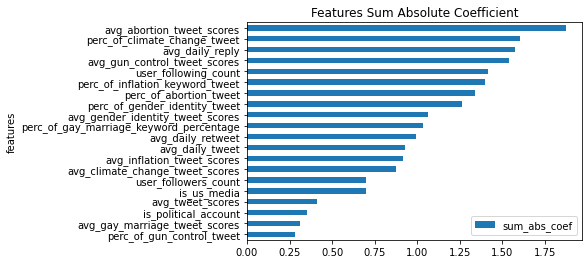

In [50]:
feat_coef.sort_values(['sum_abs_coef'],ascending=True).plot(x='features', y='sum_abs_coef', kind="barh")
plt.title("Features Sum Absolute Coefficient")
plt.show()

In [51]:
important_features = feat_coef['features'][list(feat_coef['sum_abs_coef']>=0.95)]
new_x = x[important_features]

print("Redundent feature count:", len(feat_coef['features'][list(feat_coef['sum_abs_coef']<0.95)]))
print("Redundent features:", list(feat_coef['features'][list(feat_coef['sum_abs_coef']<0.95)]))
print("Selected feature count:", len(important_features))
print("Selected features:", list(important_features))

Redundent feature count: 9
Redundent features: ['user_followers_count', 'is_us_media', 'is_political_account', 'avg_tweet_scores', 'avg_gay_marriage_tweet_scores', 'avg_climate_change_tweet_scores', 'avg_inflation_tweet_scores', 'avg_daily_tweet', 'perc_of_gun_control_tweet']
Selected feature count: 11
Selected features: ['user_following_count', 'avg_abortion_tweet_scores', 'avg_gun_control_tweet_scores', 'avg_gender_identity_tweet_scores', 'avg_daily_retweet', 'avg_daily_reply', 'perc_of_abortion_tweet', 'perc_of_gay_marriage_keyword_percentage', 'perc_of_climate_change_tweet', 'perc_of_gender_identity_tweet', 'perc_of_inflation_keyword_tweet']


In [52]:
selector_lr_model_standardised = SelectFromModel(LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=1.0)).fit(x_standardised,y)
selector_lr_model_standardised_support = selector_lr_model_standardised.get_support()
selector_lr_model_standardised_feature = x.loc[:,selector_lr_model_standardised_support].columns.tolist()
print(str(len(selector_lr_model_standardised_feature)), 'selected features:', selector_lr_model_standardised_feature)

10 selected features: ['user_following_count', 'avg_abortion_tweet_scores', 'avg_gun_control_tweet_scores', 'avg_gender_identity_tweet_scores', 'avg_daily_reply', 'perc_of_abortion_tweet', 'perc_of_gay_marriage_keyword_percentage', 'perc_of_climate_change_tweet', 'perc_of_gender_identity_tweet', 'perc_of_inflation_keyword_tweet']


In [53]:
selected_x_standardised = selector_lr_model_standardised.transform(x_standardised)
selected_x_standardised.shape

(59, 10)

In [54]:
# new_x_standardised = scaler.fit_transform(new_x)

   k_fold  avg_accuracy  standard_deviation
0       2         0.724               0.063
1       3         0.733               0.103
2       4         0.752               0.097
3       5         0.769               0.109
4       6         0.767               0.131
5       7         0.767               0.118
6       8         0.766               0.135
7       9         0.764               0.163
8      10         0.769               0.156
   loocv_n  avg_accuracy  standard_deviation
0       59         0.763               0.425


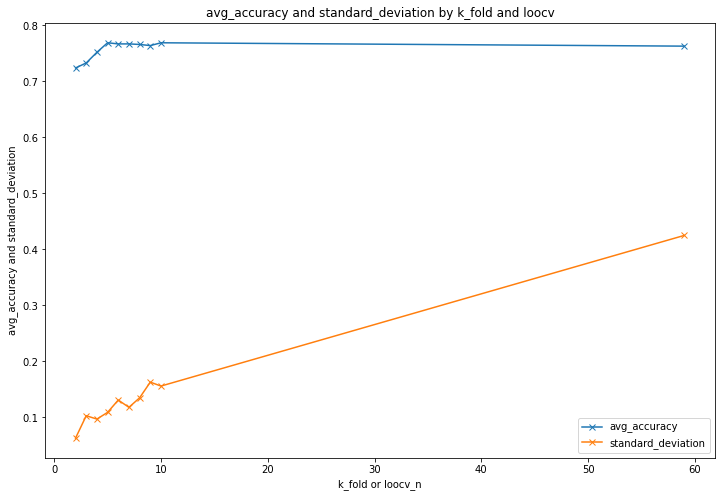

                                 index  \
0        5_to_10_fold_avg_avg_accuracy   
1  5_to_10_fold_avg_standard_deviation   

   lr_model_standardised_selected_features  
0                                 0.767000  
1                                 0.135333  


In [55]:
# define the multinomial logistic regression model
lr_model_standardised_selected_features = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=1.0)

# train a logistic regression model
lr_model_standardised_selected_features.fit(selected_x_standardised,y)

# evaluate the model with repeated kfold cross-validation and LeaveOneOut techniques
kfold_scores_df = evaluate_model_kfold_scores(lr_model_standardised_selected_features, selected_x_standardised, y, k_values)
print(kfold_scores_df)

loocv_scores_df = evaluate_model_loocv_scores(lr_model_standardised_selected_features, selected_x_standardised, y)
print(loocv_scores_df)

# plot the model performance scores
lr_model_standardised_selected_features_scores_df = combine_kfold_loocv_scores(kfold_scores_df,loocv_scores_df)
plot_model_scores(lr_model_standardised_selected_features_scores_df)

# average avg_accuracy and standard_deviation for 5-10 folds
lr_model_standardised_selected_features_kfold_5_10_scores_df = kfold_5_10_scores(lr_model_standardised_selected_features_scores_df)
lr_model_standardised_selected_features_kfold_5_10_evaluation = average_accuracy_and_standard_deviation(lr_model_standardised_selected_features_kfold_5_10_scores_df, 'lr_model_standardised_selected_features')
print(lr_model_standardised_selected_features_kfold_5_10_evaluation)

#### logistic regression best model using GridSearchCV

In [92]:
# Perform GridSearchCV to tune best-fit LR model
param = {'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100],
         'penalty':['l2'],
         'solver'  : ['newton-cg', 'lbfgs', 'sag', 'saga']}

lr_model = LogisticRegression(multi_class='multinomial',max_iter = 4000)
lr_gs_model = GridSearchCV(estimator=lr_model, param_grid=param, scoring='accuracy', cv=10)
lr_gs_model.fit(selected_x_standardised,y)

lr_gridsearch_best_model = lr_gs_model.best_estimator_
print(lr_gs_model.best_score_, lr_gs_model.best_params_)

0.8099999999999999 {'C': 100, 'penalty': 'l2', 'solver': 'sag'}


In [93]:
lr_gridsearch_best_model.get_params(deep=True)

{'C': 100,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 4000,
 'multi_class': 'multinomial',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'sag',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [94]:
print('intercept', lr_gridsearch_best_model.intercept_)
print('classes', lr_gridsearch_best_model.classes_)

coef_1 = lr_gridsearch_best_model.coef_[0]
coef_2 = lr_gridsearch_best_model.coef_[1]
coef_3 = lr_gridsearch_best_model.coef_[2]
list_of_tuples = list(zip(selector_lr_model_standardised_feature, coef_1, coef_2, coef_3))
feat_coef = pd.DataFrame(list_of_tuples, columns = ['features', 'coef_1', 'coef_2', 'coef_3'])
feat_coef

intercept [ 5.67965045 -1.19479528 -4.48485517]
classes ['Left' 'Middle' 'Right']


features    coef_1    coef_2    coef_3
0                     user_following_count -2.814135  1.769752  1.044383
1                avg_abortion_tweet_scores  2.476955  2.067452 -4.544407
2             avg_gun_control_tweet_scores  3.905815 -1.558379 -2.347436
3         avg_gender_identity_tweet_scores -0.983889  3.539438 -2.555549
4                          avg_daily_reply  2.043359  2.201252 -4.244611
5                   perc_of_abortion_tweet  4.268593 -3.624812 -0.643781
6  perc_of_gay_marriage_keyword_percentage  2.151519 -1.689227 -0.462292
7             perc_of_climate_change_tweet  2.360903 -2.000747 -0.360155
8            perc_of_gender_identity_tweet -4.048296  0.971742  3.076554
9          perc_of_inflation_keyword_tweet -2.330927  0.108744  2.222183

   k_fold  avg_accuracy  standard_deviation
0       2         0.697               0.089
1       3         0.715               0.120
2       4         0.747               0.121
3       5         0.765               0.122
4       6         0.765               0.147
5       7         0.776               0.150
6       8         0.784               0.168
7       9         0.797               0.163
8      10         0.805               0.166
   loocv_n  avg_accuracy  standard_deviation
0       59         0.814               0.389


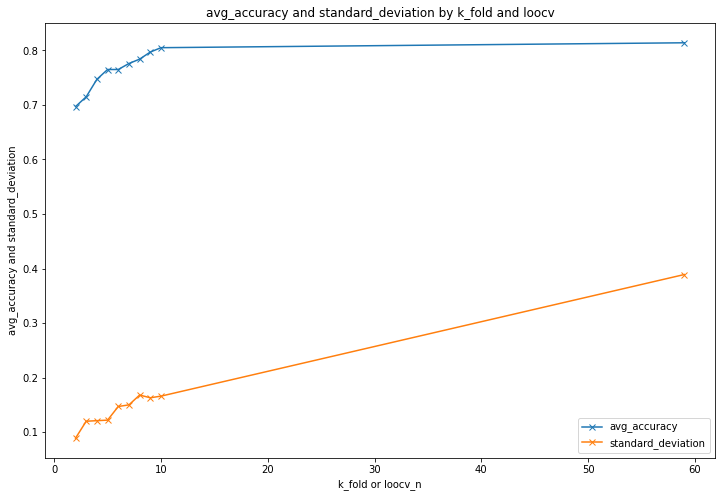

                                 index  \
0        5_to_10_fold_avg_avg_accuracy   
1  5_to_10_fold_avg_standard_deviation   

   lr_gs_best_model_standardised_selected_features  
0                                         0.782000  
1                                         0.152667  


In [97]:
# evaluate the model with repeated kfold cross-validation and LeaveOneOut techniques
kfold_scores_df = evaluate_model_kfold_scores(lr_gridsearch_best_model, selected_x_standardised, y, k_values)
print(kfold_scores_df)

loocv_scores_df = evaluate_model_loocv_scores(lr_gridsearch_best_model, selected_x_standardised, y)
print(loocv_scores_df)

# plot the model performance scores
lr_gridsearch_best_model_scores_df = combine_kfold_loocv_scores(kfold_scores_df,loocv_scores_df)
plot_model_scores(lr_gridsearch_best_model_scores_df)

# average avg_accuracy and standard_deviation for 5-10 folds
lr_gridsearch_best_model_kfold_5_10_scores_df = kfold_5_10_scores(lr_gridsearch_best_model_scores_df)
lr_gridsearch_best_model_kfold_5_10_evaluation = average_accuracy_and_standard_deviation(lr_gridsearch_best_model_kfold_5_10_scores_df, 'lr_gs_best_model_standardised_selected_features')
print(lr_gridsearch_best_model_kfold_5_10_evaluation)

In [98]:
for k in [5,6,7,8,9,10]:
    cv = RepeatedStratifiedKFold(n_splits=k, n_repeats=10, random_state=1)
    scores = cross_val_score(lr_gridsearch_best_model, selected_x_standardised, y, scoring='accuracy', cv=cv, n_jobs=-1)
    print('k: ', k, ', scores: ', scores)

k:  5 , scores:  [0.66666667 0.91666667 0.91666667 0.66666667 0.81818182 0.75
 0.83333333 0.83333333 0.75       0.54545455 0.83333333 0.91666667
 0.58333333 0.75       0.72727273 0.66666667 0.75       0.66666667
 0.83333333 0.72727273 0.83333333 0.75       0.66666667 0.83333333
 0.54545455 0.75       0.91666667 0.83333333 0.75       0.54545455
 1.         0.83333333 0.58333333 0.66666667 0.63636364 0.91666667
 0.83333333 0.91666667 0.83333333 0.72727273 0.66666667 0.75
 1.         0.66666667 0.81818182 0.75       0.75       0.5
 0.83333333 1.        ]
k:  6 , scores:  [0.7        0.7        0.9        0.9        0.8        0.77777778
 0.8        0.9        0.8        0.8        0.6        0.55555556
 0.8        1.         0.7        0.5        0.9        0.66666667
 0.8        0.7        0.8        0.9        0.7        0.77777778
 0.8        0.6        0.8        0.8        0.9        0.44444444
 0.8        0.9        0.9        0.7        0.8        0.44444444
 1.         0.8        

### naive bayes

In [61]:
x = combined_analysis_data[[
    'user_followers_count',
    'user_following_count',
    'is_us_media',
    'is_political_account',
    'avg_tweet_scores',
    'avg_abortion_tweet_scores',
    'avg_gun_control_tweet_scores',
    'avg_gay_marriage_tweet_scores',
    'avg_climate_change_tweet_scores',
    'avg_gender_identity_tweet_scores',
    'avg_inflation_tweet_scores',
    'avg_daily_tweet',
    'avg_daily_retweet',
    'avg_daily_reply',
    'perc_of_abortion_tweet',
    'perc_of_gun_control_tweet',
    'perc_of_gay_marriage_keyword_percentage',
    'perc_of_climate_change_tweet',
    'perc_of_gender_identity_tweet',
    'perc_of_inflation_keyword_tweet'    
]]
y = combined_analysis_data['political_spectrum']

In [62]:
# scale x because MultinomialNB doesn't take negative value for x
x_scaled = MinMaxScaler().fit_transform(x)

#### naive bayes with x in scaled values

   k_fold  avg_accuracy  standard_deviation
0       2         0.630               0.018
1       3         0.631               0.029
2       4         0.626               0.030
3       5         0.624               0.039
4       6         0.626               0.041
5       7         0.630               0.042
6       8         0.629               0.057
7       9         0.631               0.058
8      10         0.627               0.074
   loocv_n  avg_accuracy  standard_deviation
0       59         0.627               0.484


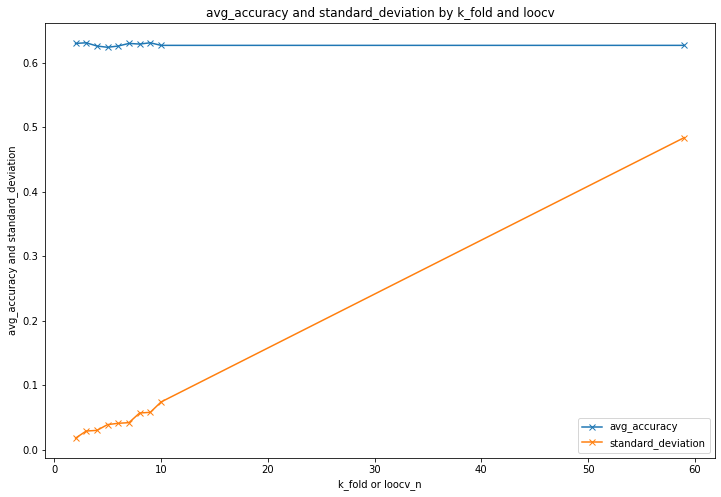

                                 index  nb_model
0        5_to_10_fold_avg_avg_accuracy  0.627833
1  5_to_10_fold_avg_standard_deviation  0.051833


In [63]:
# define the multinomial naive bayes model
nb_model = MultinomialNB()

# train a logistic regression model
nb_model.fit(x_scaled,y)

# evaluate the model with repeated kfold cross-validation and LeaveOneOut techniques
kfold_scores_df = evaluate_model_kfold_scores(nb_model, x_scaled, y, k_values)
print(kfold_scores_df)

loocv_scores_df = evaluate_model_loocv_scores(nb_model, x_scaled, y)
print(loocv_scores_df)

# plot the model performance scores
nb_model_scores_df = combine_kfold_loocv_scores(kfold_scores_df,loocv_scores_df)
plot_model_scores(nb_model_scores_df)

# average avg_accuracy and standard_deviation for 5-10 folds
nb_model_kfold_5_10_scores_df = kfold_5_10_scores(nb_model_scores_df)
nb_model_kfold_5_10_evaluation = average_accuracy_and_standard_deviation(nb_model_kfold_5_10_scores_df, 'nb_model')
print(nb_model_kfold_5_10_evaluation)

#### naive bayes with standardised and scaled x

In [89]:
x_standardised = scaler.fit_transform(x)
x_standardised_scaled = MinMaxScaler().fit_transform(x_standardised)

   k_fold  avg_accuracy  standard_deviation
0       2         0.630               0.018
1       3         0.631               0.029
2       4         0.626               0.030
3       5         0.624               0.039
4       6         0.626               0.041
5       7         0.630               0.042
6       8         0.629               0.057
7       9         0.631               0.058
8      10         0.627               0.074
   loocv_n  avg_accuracy  standard_deviation
0       59         0.627               0.484


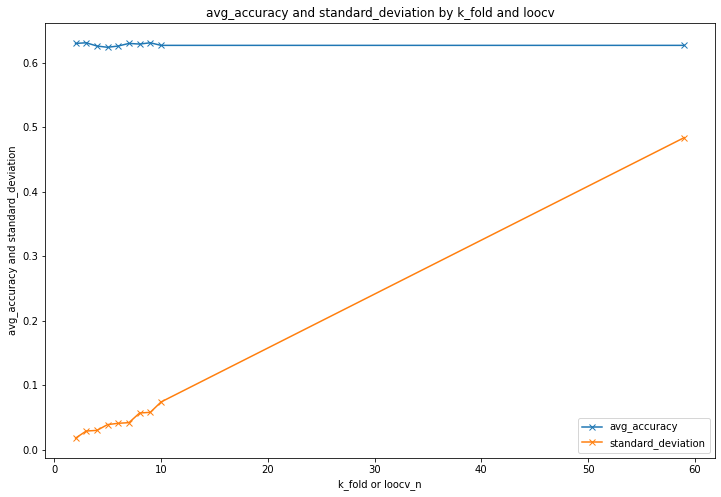

                                 index  nb_model_standardised
0        5_to_10_fold_avg_avg_accuracy               0.627833
1  5_to_10_fold_avg_standard_deviation               0.051833


In [103]:
# define the multinomial naive bayes model
nb_model_standardised = MultinomialNB()

# train a logistic regression model
nb_model_standardised.fit(x_standardised_scaled,y)

# evaluate the model with repeated kfold cross-validation and LeaveOneOut techniques
kfold_scores_df = evaluate_model_kfold_scores(nb_model_standardised, x_standardised_scaled, y, k_values)
print(kfold_scores_df)

loocv_scores_df = evaluate_model_loocv_scores(nb_model_standardised, x_standardised_scaled, y)
print(loocv_scores_df)

# plot the model performance scores
nb_model_standardised_scores_df = combine_kfold_loocv_scores(kfold_scores_df,loocv_scores_df)
plot_model_scores(nb_model_standardised_scores_df)

# average avg_accuracy and standard_deviation for 5-10 folds
nb_model_standardised_kfold_5_10_scores_df = kfold_5_10_scores(nb_model_standardised_scores_df)
nb_model_standardised_kfold_5_10_evaluation = average_accuracy_and_standard_deviation(nb_model_standardised_kfold_5_10_scores_df, 'nb_model_standardised')
print(nb_model_standardised_kfold_5_10_evaluation)

#### naive bayes with selected x using feature_log_prob_

In [64]:
selector_nb_model = SelectFromModel(MultinomialNB(), importance_getter='feature_log_prob_').fit(x_scaled,y)
selector_nb_model_support = selector_nb_model.get_support()
selector_nb_model_feature = x.loc[:,selector_nb_model_support].columns.tolist()
print(str(len(selector_nb_model_feature)), 'selected features:', selector_nb_model_feature)

9 selected features: ['user_followers_count', 'user_following_count', 'is_political_account', 'avg_daily_tweet', 'avg_daily_retweet', 'avg_daily_reply', 'perc_of_abortion_tweet', 'perc_of_gun_control_tweet', 'perc_of_gay_marriage_keyword_percentage']


In [65]:
selected_x_scaled = selector_nb_model.transform(x_scaled)
selected_x_scaled.shape

(59, 9)

   k_fold  avg_accuracy  standard_deviation
0       2         0.620               0.023
1       3         0.627               0.021
2       4         0.627               0.029
3       5         0.627               0.038
4       6         0.628               0.040
5       7         0.627               0.034
6       8         0.627               0.055
7       9         0.630               0.054
8      10         0.627               0.066
   loocv_n  avg_accuracy  standard_deviation
0       59         0.627               0.484


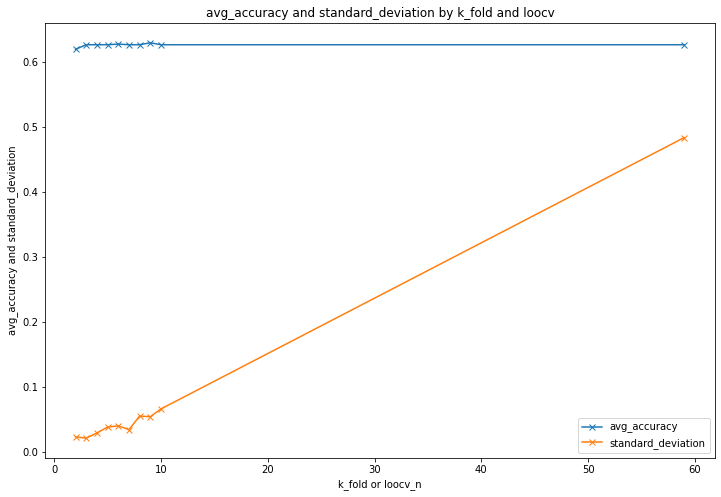

                                 index  nb_model_selected_features
0        5_to_10_fold_avg_avg_accuracy                    0.627667
1  5_to_10_fold_avg_standard_deviation                    0.047833


In [66]:
# define the multinomial naive bayes model
nb_model_selected_features = MultinomialNB()

# train a logistic regression model
nb_model_selected_features.fit(selected_x_scaled,y)

# evaluate the model with repeated kfold cross-validation and LeaveOneOut techniques
kfold_scores_df = evaluate_model_kfold_scores(nb_model_selected_features, selected_x_scaled, y, k_values)
print(kfold_scores_df)

loocv_scores_df = evaluate_model_loocv_scores(nb_model_selected_features, selected_x_scaled, y)
print(loocv_scores_df)

# plot the model performance scores
nb_model_selected_features_scores_df = combine_kfold_loocv_scores(kfold_scores_df,loocv_scores_df)
plot_model_scores(nb_model_selected_features_scores_df)

# average avg_accuracy and standard_deviation for 5-10 folds
nb_model_selected_features_kfold_5_10_scores_df = kfold_5_10_scores(nb_model_selected_features_scores_df)
nb_model_selected_features_kfold_5_10_evaluation = average_accuracy_and_standard_deviation(nb_model_selected_features_kfold_5_10_scores_df, 'nb_model_selected_features')
print(nb_model_selected_features_kfold_5_10_evaluation)

#### lnaive bayes best model using GridSearchCV

In [67]:
# Perform GridSearchCV to tune best-fit NB model
param = {"alpha": [0.00001, 0.0001, 0.001, 0.1, 1.0, 10, 100],
         "fit_prior":[True, False],
         "class_prior": [[37/59, 12/59, 10/59], None]}

nb_model = MultinomialNB()
nb_gs_model = GridSearchCV(estimator=nb_model, param_grid=param, scoring='accuracy', cv=10)
nb_gs_model.fit(selected_x_scaled,y)

nb_gridsearch_best_model = nb_gs_model.best_estimator_
print(nb_gs_model.best_score_, nb_gs_model.best_params_)

0.6433333333333333 {'alpha': 0.1, 'class_prior': [0.6271186440677966, 0.2033898305084746, 0.1694915254237288], 'fit_prior': True}


In [68]:
nb_gridsearch_best_model.get_params(deep=True)

{'alpha': 0.1,
 'class_prior': [0.6271186440677966, 0.2033898305084746, 0.1694915254237288],
 'fit_prior': True}

   k_fold  avg_accuracy  standard_deviation
0       2         0.624               0.038
1       3         0.627               0.037
2       4         0.631               0.045
3       5         0.635               0.041
4       6         0.631               0.060
5       7         0.639               0.058
6       8         0.631               0.078
7       9         0.643               0.067
8      10         0.637               0.082
   loocv_n  avg_accuracy  standard_deviation
0       59         0.644               0.479


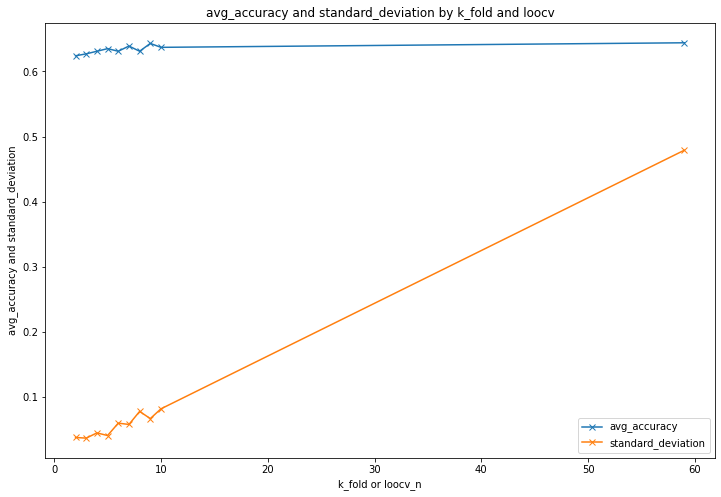

                                 index  nb_gs_best_model_selected_features
0        5_to_10_fold_avg_avg_accuracy                            0.636000
1  5_to_10_fold_avg_standard_deviation                            0.064333


In [69]:
# evaluate the model with repeated kfold cross-validation and LeaveOneOut techniques
kfold_scores_df = evaluate_model_kfold_scores(nb_gridsearch_best_model, selected_x_scaled, y, k_values)
print(kfold_scores_df)

loocv_scores_df = evaluate_model_loocv_scores(nb_gridsearch_best_model, selected_x_scaled, y)
print(loocv_scores_df)

# plot the model performance scores
nb_gridsearch_best_model_scores_df = combine_kfold_loocv_scores(kfold_scores_df,loocv_scores_df)
plot_model_scores(nb_gridsearch_best_model_scores_df)

# average avg_accuracy and standard_deviation for 5-10 folds
nb_gridsearch_best_model_kfold_5_10_scores_df = kfold_5_10_scores(nb_gridsearch_best_model_scores_df)
nb_gridsearch_best_model_kfold_5_10_evaluation = average_accuracy_and_standard_deviation(nb_gridsearch_best_model_kfold_5_10_scores_df, 'nb_gs_best_model_selected_features')
print(nb_gridsearch_best_model_kfold_5_10_evaluation)

In [83]:
for k in [5,6,7,8,9,10]:
    cv = RepeatedStratifiedKFold(n_splits=k, n_repeats=10, random_state=1)
    scores = cross_val_score(nb_gridsearch_best_model, selected_x_scaled, y, scoring='accuracy', cv=cv, n_jobs=-1)
    print('k: ', k, ', scores: ', scores)

k:  5 , scores:  [0.66666667 0.66666667 0.58333333 0.66666667 0.63636364 0.58333333
 0.66666667 0.58333333 0.58333333 0.63636364 0.66666667 0.66666667
 0.58333333 0.66666667 0.63636364 0.66666667 0.66666667 0.66666667
 0.58333333 0.63636364 0.66666667 0.66666667 0.58333333 0.66666667
 0.63636364 0.66666667 0.66666667 0.66666667 0.58333333 0.63636364
 0.66666667 0.66666667 0.58333333 0.66666667 0.54545455 0.66666667
 0.66666667 0.66666667 0.58333333 0.63636364 0.75       0.58333333
 0.58333333 0.58333333 0.63636364 0.66666667 0.66666667 0.58333333
 0.58333333 0.63636364]
k:  6 , scores:  [0.7        0.6        0.6        0.6        0.7        0.66666667
 0.6        0.6        0.6        0.6        0.6        0.66666667
 0.7        0.6        0.6        0.6        0.7        0.66666667
 0.7        0.6        0.6        0.7        0.6        0.66666667
 0.7        0.6        0.6        0.6        0.6        0.66666667
 0.7        0.5        0.6        0.6        0.6        0.66666667
 0.7

In [70]:
# Perform GridSearchCV to tune best-fit NB model with all features
param = {"alpha": [0.00001, 0.0001, 0.001, 0.1, 1.0, 10, 100],
         "fit_prior":[True, False],
         "class_prior": [[37/59, 12/59, 10/59], None]}

nb_model = MultinomialNB()
nb_gs_model = GridSearchCV(estimator=nb_model, param_grid=param, scoring='accuracy', cv=10)
nb_gs_model.fit(x_scaled,y)

nb_gridsearch_best_model_all_features = nb_gs_model.best_estimator_
print(nb_gs_model.best_score_, nb_gs_model.best_params_)

0.6966666666666665 {'alpha': 1e-05, 'class_prior': None, 'fit_prior': False}


In [71]:
nb_gridsearch_best_model_all_features.get_params(deep=True)

{'alpha': 1e-05, 'class_prior': None, 'fit_prior': False}

   k_fold  avg_accuracy  standard_deviation
0       2         0.608               0.088
1       3         0.657               0.110
2       4         0.662               0.123
3       5         0.663               0.116
4       6         0.668               0.143
5       7         0.671               0.141
6       8         0.671               0.147
7       9         0.674               0.158
8      10         0.667               0.177
   loocv_n  avg_accuracy  standard_deviation
0       59         0.661               0.473


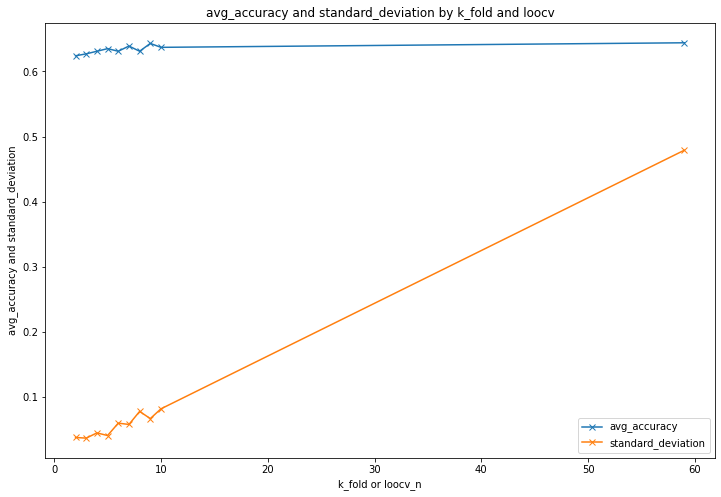

                                 index  nb_gs_best_model
0        5_to_10_fold_avg_avg_accuracy          0.636000
1  5_to_10_fold_avg_standard_deviation          0.064333


In [81]:
# evaluate the model with repeated kfold cross-validation and LeaveOneOut techniques
kfold_scores_df = evaluate_model_kfold_scores(nb_gridsearch_best_model_all_features, x_scaled, y, k_values)
print(kfold_scores_df)

loocv_scores_df = evaluate_model_loocv_scores(nb_gridsearch_best_model_all_features, x_scaled, y)
print(loocv_scores_df)

# plot the model performance scores
nb_gridsearch_best_model_all_features_scores_df = combine_kfold_loocv_scores(kfold_scores_df,loocv_scores_df)
plot_model_scores(nb_gridsearch_best_model_scores_df)

# average avg_accuracy and standard_deviation for 5-10 folds
nb_gridsearch_best_model_all_features_kfold_5_10_scores_df = kfold_5_10_scores(nb_gridsearch_best_model_scores_df)
nb_gridsearch_best_model_all_features_kfold_5_10_evaluation = average_accuracy_and_standard_deviation(nb_gridsearch_best_model_all_features_kfold_5_10_scores_df, 'nb_gs_best_model')
print(nb_gridsearch_best_model_all_features_kfold_5_10_evaluation)

In [73]:
# modles evaluations

In [100]:


model_evaluation_df = dtree_gini_kfold_5_10_evaluation.merge(dtree_entropy_kfold_5_10_evaluation, left_on='index', right_on='index')
model_evaluation_df = model_evaluation_df.merge(dtree_gini_standardised_kfold_5_10_evaluation, left_on='index', right_on='index')
model_evaluation_df = model_evaluation_df.merge(dtree_entropy_standardised_kfold_5_10_evaluation, left_on='index', right_on='index')
model_evaluation_df = model_evaluation_df.merge(dtree_gini_selected_features_kfold_5_10_evaluation, left_on='index', right_on='index')
model_evaluation_df = model_evaluation_df.merge(dtree_entropy_selected_features_kfold_5_10_evaluation, left_on='index', right_on='index')
model_evaluation_df = model_evaluation_df.merge(dtree_gridsearch_best_model_kfold_5_10_evaluation, left_on='index', right_on='index')
model_evaluation_df = model_evaluation_df.merge(lr_model_kfold_5_10_evaluation, left_on='index', right_on='index')
model_evaluation_df = model_evaluation_df.merge(lr_model_standardised_kfold_5_10_evaluation, left_on='index', right_on='index')
model_evaluation_df = model_evaluation_df.merge(lr_model_standardised_selected_features_kfold_5_10_evaluation, left_on='index', right_on='index')
model_evaluation_df = model_evaluation_df.merge(lr_gridsearch_best_model_kfold_5_10_evaluation, left_on='index', right_on='index')
model_evaluation_df = model_evaluation_df.merge(nb_model_kfold_5_10_evaluation, left_on='index', right_on='index')
model_evaluation_df = model_evaluation_df.merge(nb_model_selected_features_kfold_5_10_evaluation, left_on='index', right_on='index')
model_evaluation_df = model_evaluation_df.merge(nb_gridsearch_best_model_kfold_5_10_evaluation, left_on='index', right_on='index')
model_evaluation_df = model_evaluation_df.merge(nb_gridsearch_best_model_all_features_kfold_5_10_evaluation, left_on='index', right_on='index')

model_evaluation_df = model_evaluation_df.round(3)
model_evaluation_df_transposed = model_evaluation_df.transpose()

header_row = 0
model_evaluation_df_transposed.columns = model_evaluation_df_transposed.iloc[header_row]
model_evaluation_df_transposed = model_evaluation_df_transposed.drop(['index']).reset_index()

model_evaluation_df_transposed

index                                              index  \
0                                             dtree_gini   
1                                          dtree_entropy   
2                                dtree_gini_standardised   
3                             dtree_entropy_standardised   
4              dtree_gini_standardised_selected_features   
5           dtree_entropy_standardised_selected_features   
6      dtree_gs_best_model_standardised_selected_feat...   
7                                               lr_model   
8                                  lr_model_standardised   
9                lr_model_standardised_selected_features   
10       lr_gs_best_model_standardised_selected_features   
11                                              nb_model   
12                            nb_model_selected_features   
13                    nb_gs_best_model_selected_features   
14                                      nb_gs_best_model   

index 5_to_10_fold_avg_avg_accuracy 5_to_10_fold_avg_standard_deviation  
0                             0.612                               0.146  
1                             0.575                               0.142  
2                             0.606                               0.141  
3                             0.573                               0.146  
4                             0.664                               0.145  
5                             0.637                               0.147  
6                             0.653                               0.139  
7                             0.504                                0.13  
8                             0.743                               0.128  
9                             0.767                               0.135  
10                            0.782                               0.153  
11                            0.628                               0.052  
12                            0.628                               0.048  
13                            0.636                               0.064  
14                            0.636                               0.064

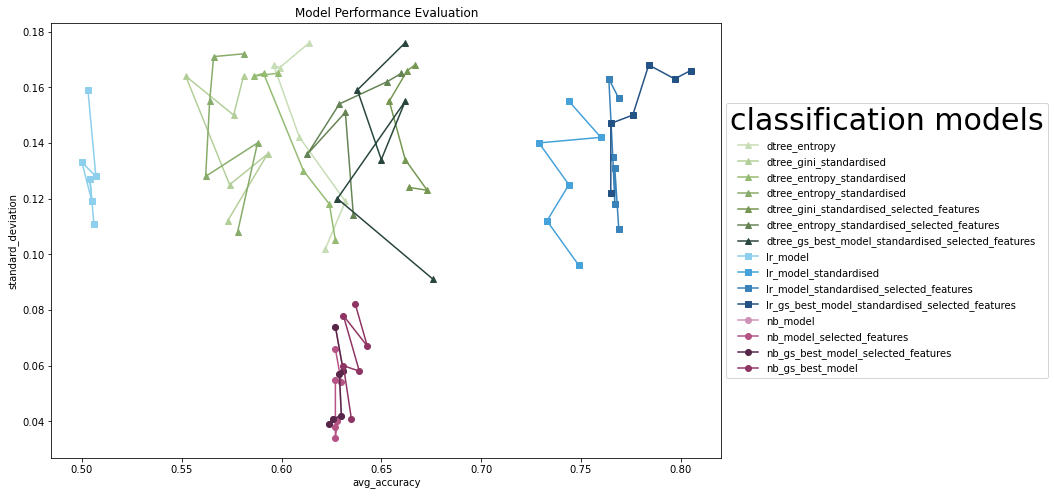

In [101]:
model_score_df_plt_lst = [[dtree_gini_kfold_5_10_scores_df, '^', '#c7ddb5', 'dtree_entropy'],
                          [dtree_entropy_kfold_5_10_scores_df, '^', '#b3cf99', 'dtree_gini_standardised'],
                          [dtree_gini_standardised_kfold_5_10_scores_df, '^', '#95bb72', 'dtree_entropy_standardised'],
                          [dtree_entropy_standardised_kfold_5_10_scores_df, '^', '#87ab69', 'dtree_entropy_standardised'],
                          [dtree_gini_selected_features_kfold_5_10_scores_df, '^', '#759751', 'dtree_gini_standardised_selected_features'],
                          [dtree_entropy_selected_features_kfold_5_10_scores_df, '^', '#658354', 'dtree_entropy_standardised_selected_features'],
                          [dtree_gridsearch_best_model_kfold_5_10_scores_df, '^', '#28463e', 'dtree_gs_best_model_standardised_selected_features'],
                          [lr_model_kfold_5_10_scores_df, 's', '#8dcfec', 'lr_model'],
                          [lr_model_standardised_kfold_5_10_scores_df, 's', '#46a2da', 'lr_model_standardised'],
                          [lr_model_standardised_selected_features_kfold_5_10_scores_df, 's', '#3982ba', 'lr_model_standardised_selected_features'],
                          [lr_gridsearch_best_model_kfold_5_10_scores_df, 's', '#235284', 'lr_gs_best_model_standardised_selected_features'],
                          [nb_model_kfold_5_10_scores_df, 'o', '#cf91b5', 'nb_model'],
                          [nb_model_selected_features_kfold_5_10_scores_df, 'o', '#b55385', 'nb_model_selected_features'],
                          [nb_model_kfold_5_10_scores_df, 'o', '#572649', 'nb_gs_best_model_selected_features'],
                          [nb_gridsearch_best_model_all_features_kfold_5_10_scores_df, 'o', '#8e3563', 'nb_gs_best_model']
                     ]


plt.figure(figsize=(12,8))
for model_scores in model_score_df_plt_lst:
    plt.plot(model_scores[0]['avg_accuracy'], model_scores[0]['standard_deviation'], marker=model_scores[1], color = model_scores[2], label = model_scores[3])


plt.legend(title='classification models',title_fontsize=30,loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('avg_accuracy')
plt.ylabel('standard_deviation')
plt.title('Model Performance Evaluation')
plt.show()

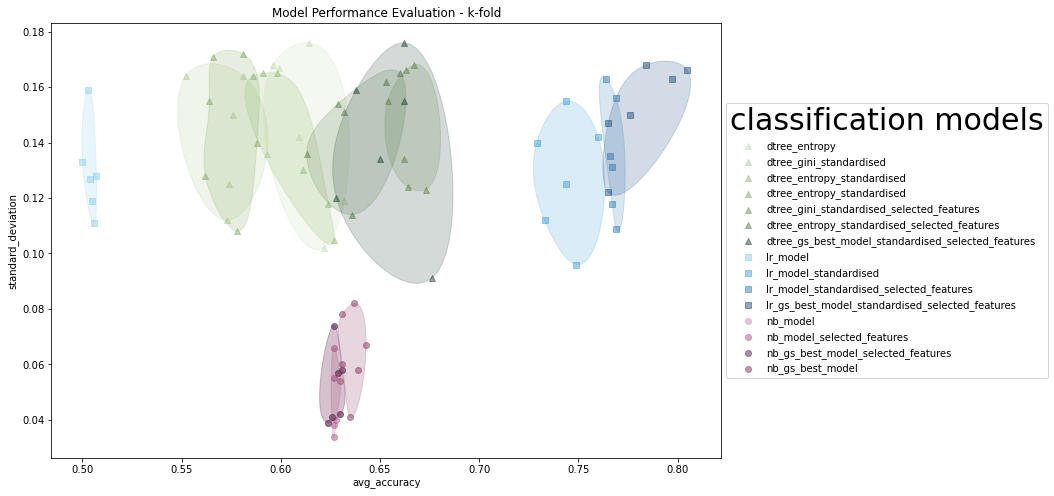

In [102]:
model_score_df_plt_lst = [[dtree_gini_kfold_5_10_scores_df, '^', '#c7ddb5', 'dtree_entropy'],
                          [dtree_entropy_kfold_5_10_scores_df, '^', '#b3cf99', 'dtree_gini_standardised'],
                          [dtree_gini_standardised_kfold_5_10_scores_df, '^', '#95bb72', 'dtree_entropy_standardised'],
                          [dtree_entropy_standardised_kfold_5_10_scores_df, '^', '#87ab69', 'dtree_entropy_standardised'],
                          [dtree_gini_selected_features_kfold_5_10_scores_df, '^', '#759751', 'dtree_gini_standardised_selected_features'],
                          [dtree_entropy_selected_features_kfold_5_10_scores_df, '^', '#658354', 'dtree_entropy_standardised_selected_features'],
                          [dtree_gridsearch_best_model_kfold_5_10_scores_df, '^', '#28463e', 'dtree_gs_best_model_standardised_selected_features'],
                          [lr_model_kfold_5_10_scores_df, 's', '#8dcfec', 'lr_model'],
                          [lr_model_standardised_kfold_5_10_scores_df, 's', '#46a2da', 'lr_model_standardised'],
                          [lr_model_standardised_selected_features_kfold_5_10_scores_df, 's', '#3982ba', 'lr_model_standardised_selected_features'],
                          [lr_gridsearch_best_model_kfold_5_10_scores_df, 's', '#235284', 'lr_gs_best_model_standardised_selected_features'],
                          [nb_model_kfold_5_10_scores_df, 'o', '#cf91b5', 'nb_model'],
                          [nb_model_selected_features_kfold_5_10_scores_df, 'o', '#b55385', 'nb_model_selected_features'],
                          [nb_model_kfold_5_10_scores_df, 'o', '#572649', 'nb_gs_best_model_selected_features'],
                          [nb_gridsearch_best_model_all_features_kfold_5_10_scores_df, 'o', '#8e3563', 'nb_gs_best_model']
                     ]


plt.figure(figsize=(12,8))
for model_scores in model_score_df_plt_lst:
    plt.scatter(model_scores[0]['avg_accuracy'], model_scores[0]['standard_deviation'], marker=model_scores[1], color = model_scores[2], alpha = 0.5, label = model_scores[3])

    # draw enclosure
    points = model_scores[0][['avg_accuracy', 'standard_deviation']].values
    # get convex hull
    hull = ConvexHull(points)
    # get x and y coordinates
    # repeat last point to close the polygon
    x_hull = np.append(points[hull.vertices,0],points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],points[hull.vertices,1][0])
    # plot shape
#     plt.fill(x_hull, y_hull, alpha=0.3, c=)
    
    # interpolate
    dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2)
    dist_along = np.concatenate(([0], dist.cumsum()))
    spline, u = interpolate.splprep([x_hull, y_hull], 
                                    u=dist_along, s=0, per=1)
    interp_d = np.linspace(dist_along[0], dist_along[-1], 50)
    interp_x, interp_y = interpolate.splev(interp_d, spline)
    # plot shape
    plt.fill(interp_x, interp_y, '--', c=model_scores[2], alpha=0.2)

plt.legend(title='classification models',title_fontsize=30,loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('avg_accuracy')
plt.ylabel('standard_deviation')
plt.title('Model Performance Evaluation - k-fold')
plt.show()